In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import cv2
import os 
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image
import random
import matplotlib.image as mpimg
from imutils import paths
import sys
import operator

In [ ]:
!pip install rich
!pip install hydra-core
!pip install pytorch-lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 23.4 MB/s 
     |████████████████████████████████| 51 kB 8.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 151 kB 39.4 MB/s 
     |████████████████████████████████| 79 kB 9.5 MB/s 
     |████████████████████████████████| 117 kB 81.1 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=94503a6818929338bb8dae2c737e51c58a7f6abf1456605933752a24c97692cc
  Stored in directory: /root/.cache/pip/wheels/8b/8d/53/2af8772d9aec614e3fc65e53d4a993ad73c61daa8bbd85a873
Successfully built antlr4-python3-runtime


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 705 kB 33.9 MB/s 
     |████████████████████████████████| 5.9 MB 56.4 MB/s 
     |████████████████████████████████| 419 kB 68.7 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.10.0 which is incompatible.


In [ ]:
sys.path.insert(0, "/content/drive/MyDrive/Github_Repos/historia_ml_handwritten_text_line_segmentation")
sys.path.insert(1, "/content/drive/MyDrive/Github_Repos/historia_ml_handwritten_text_line_segmentation/src/utils")

In [ ]:
import pytorch_lightning as pl
from src.utils.display_image_from_path import img_show
from src.utils.display_image_from_array import img_show_from_arr

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Images/OMERFAZILAKOZ17-211.jpeg")
img_mask = cv2.imread("/content/drive/MyDrive/output/test_page_predicted_masks/OMERFAZILAKOZ17-211_mask_480x480.png")

In [ ]:
img_show_from_arr(img)
img_show_from_arr(img_mask)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def delete_border_lines(mask, x_ratio, y_ratio):
  height, width, depth = mask.shape
  vertical_limit = int(height * y_ratio)
  horizontal_limit = int(width * x_ratio)
  # delete upper border
  for i in range(0, vertical_limit):
    for j in range(width):
      mask[i][j][0] = 0
      mask[i][j][1] = 0
      mask[i][j][2] = 0
  # delete left border
  for i in range(height):
    for j in range(0, horizontal_limit):
      mask[i][j][0] = 0
      mask[i][j][1] = 0
      mask[i][j][2] = 0
  # delete lower border
  for i in range(height-vertical_limit, height):
    for j in range(width):
      mask[i][j][0] = 0
      mask[i][j][1] = 0
      mask[i][j][2] = 0
  # delete right border
  for i in range(height):
    for j in range(width - horizontal_limit, width):
      mask[i][j][0] = 0
      mask[i][j][1] = 0
      mask[i][j][2] = 0
  return mask

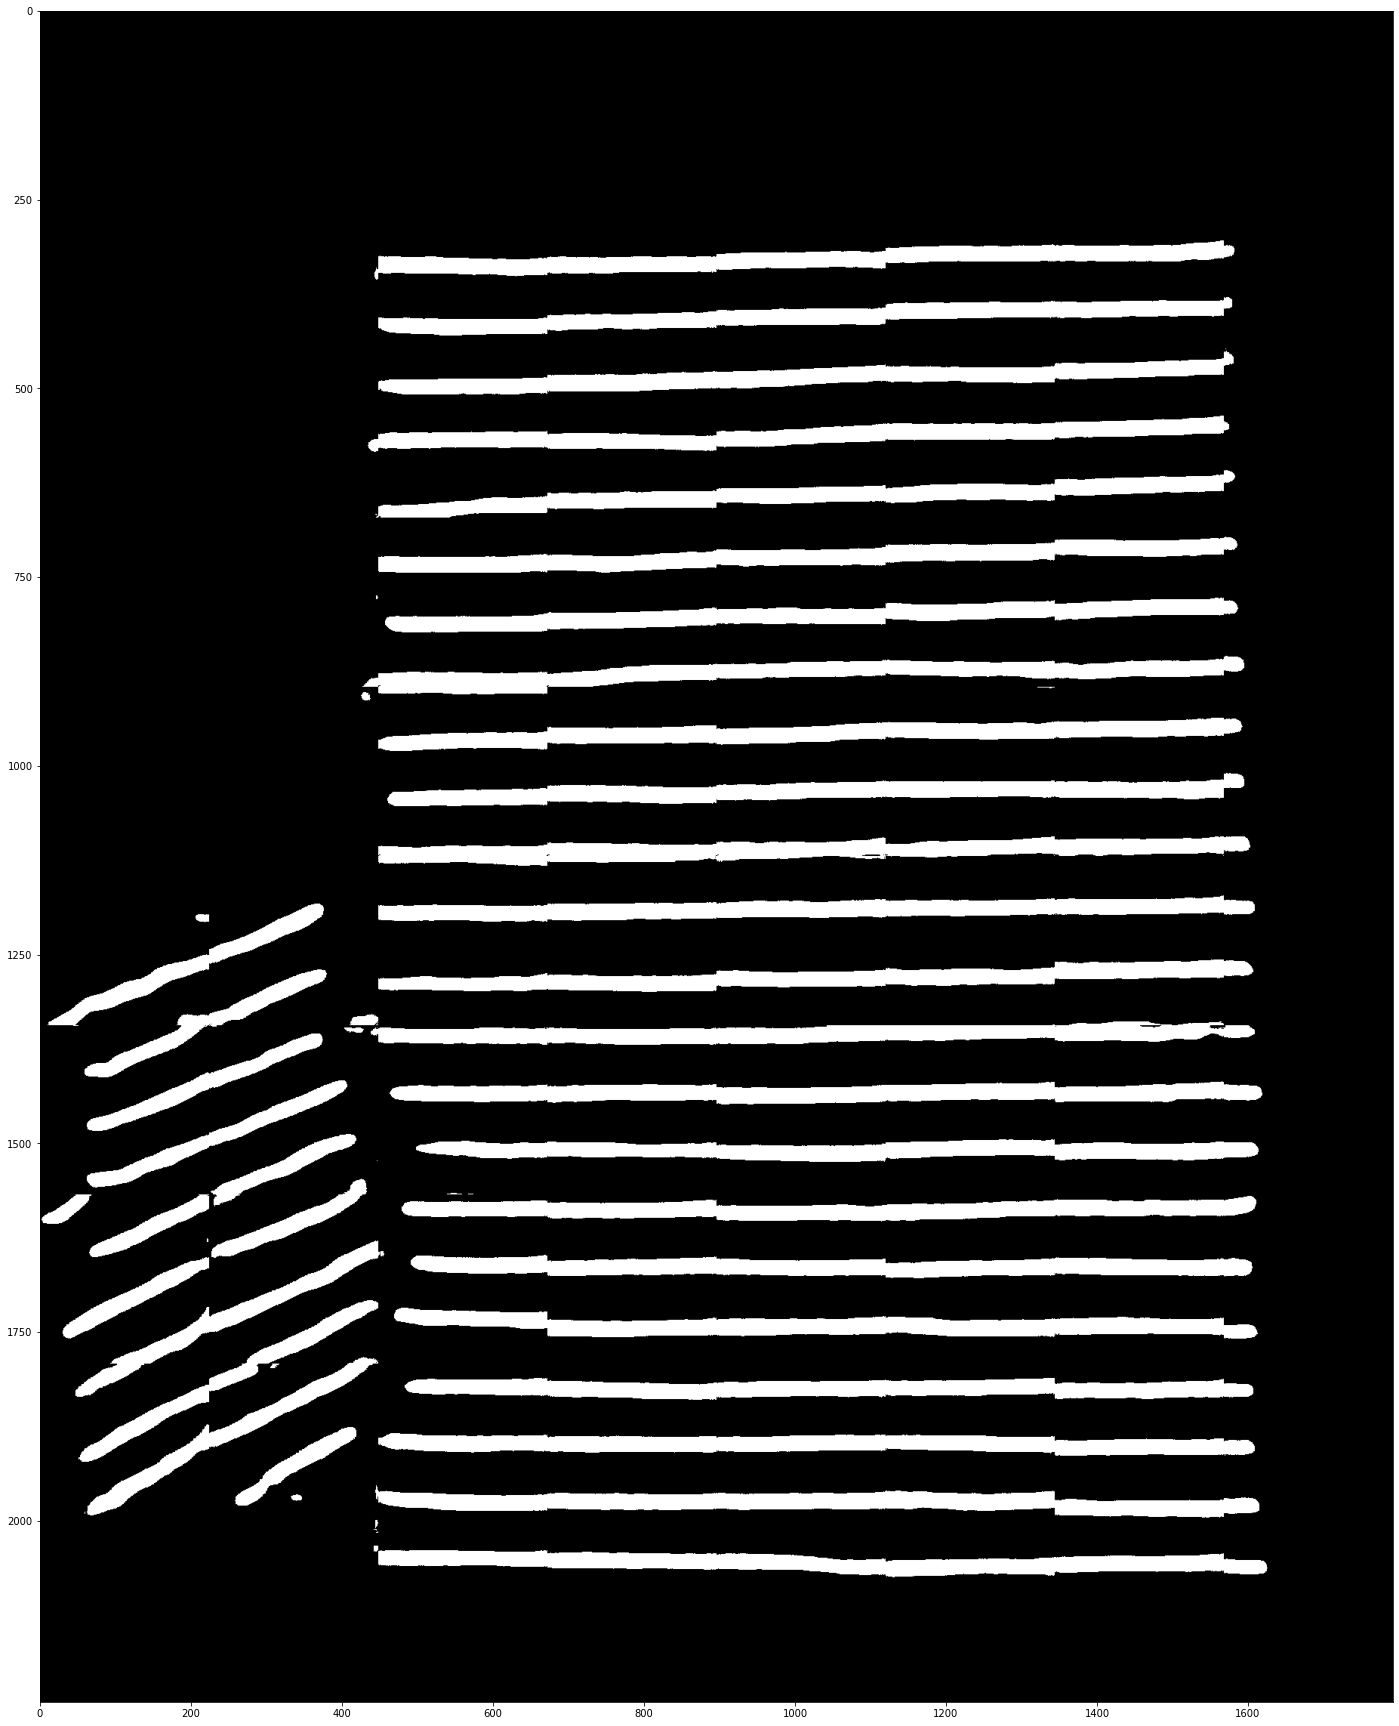

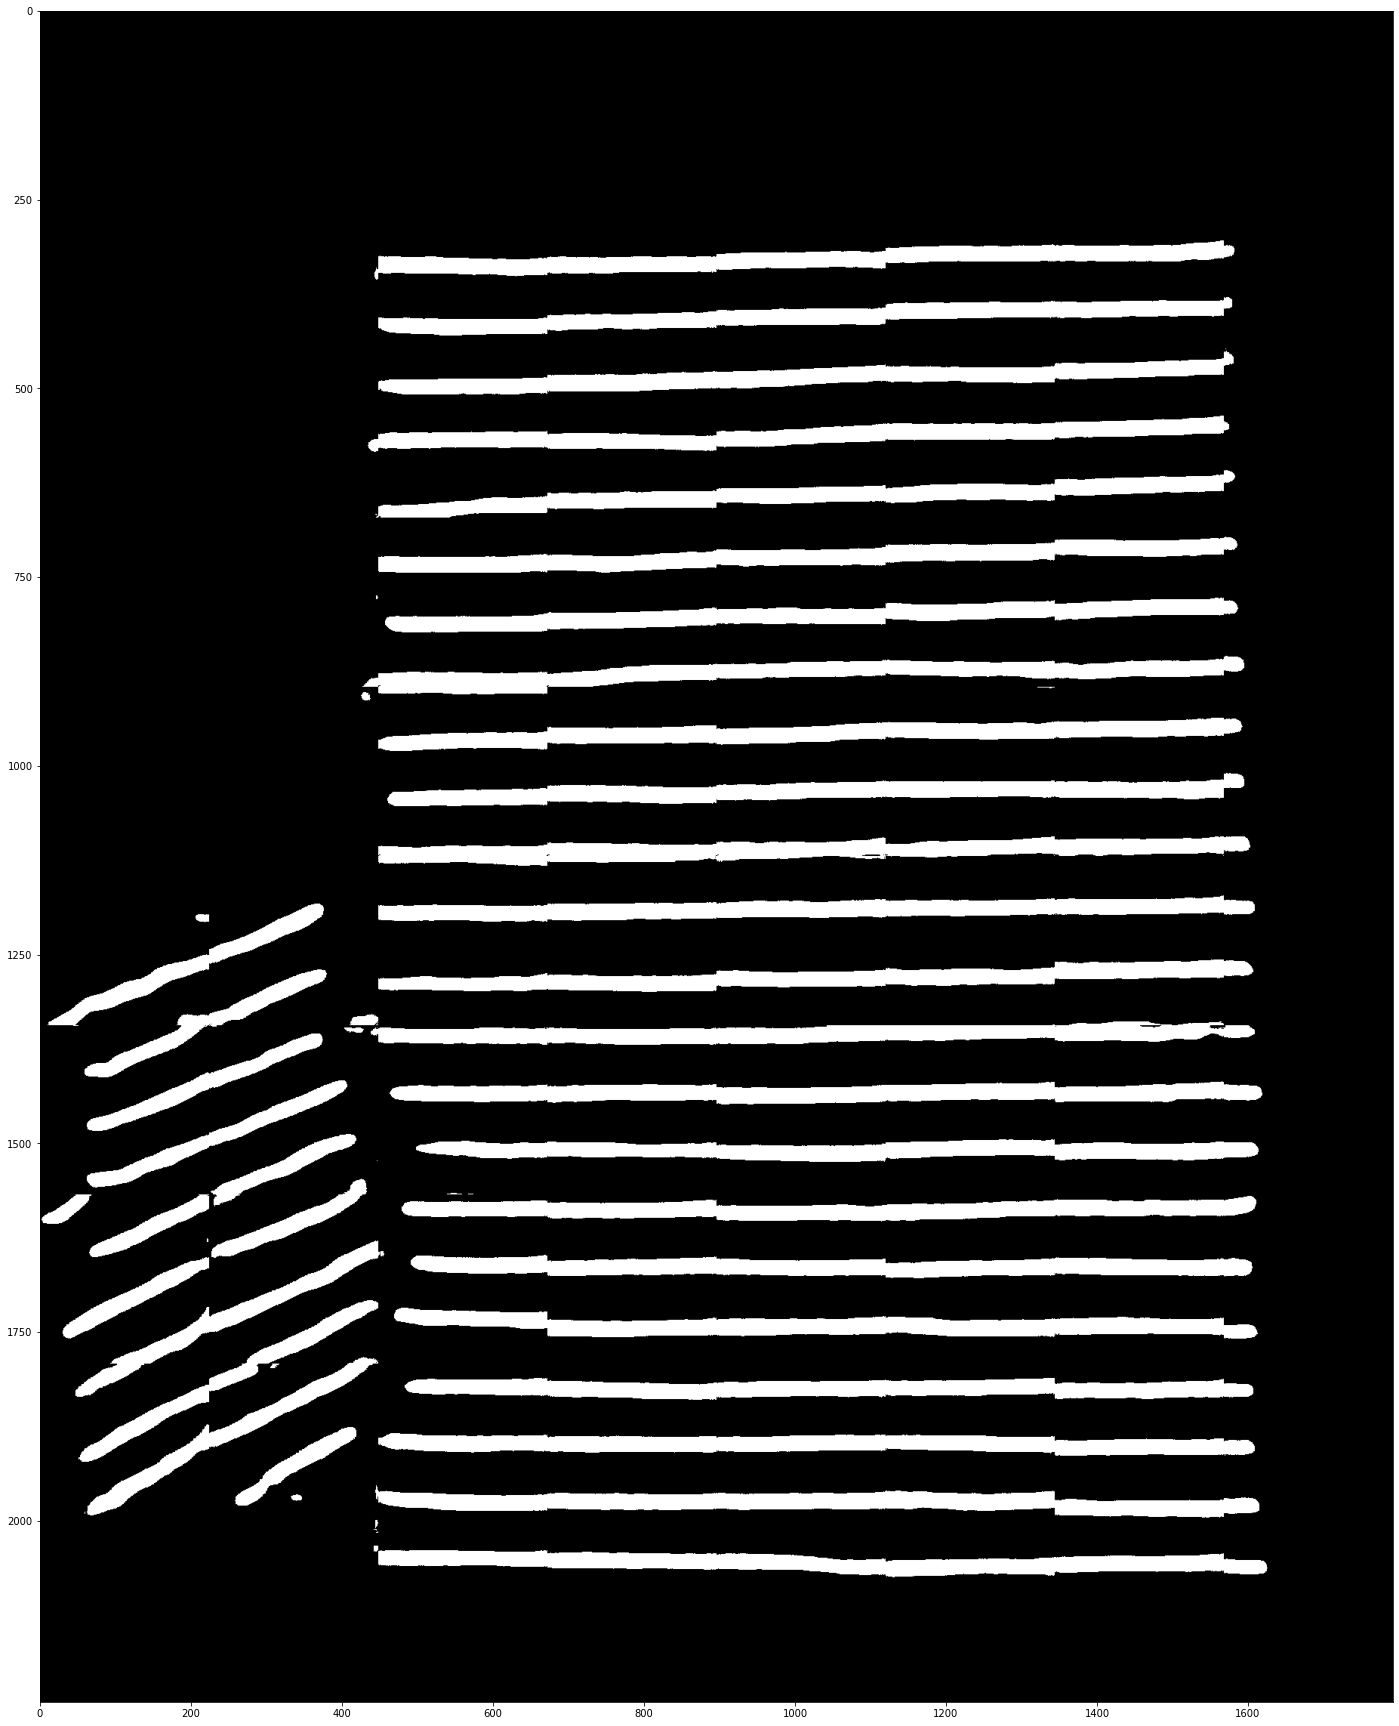

In [ ]:
mask = img_mask.copy()
mask = delete_border_lines(mask, 0.0, 0.0)

img_show_from_arr(img_mask)
img_show_from_arr(mask)

In [ ]:
def delete_center_line(mask, left_ratio, right_ratio):
  height, width, depth = mask.shape
  center = width // 2
  left_border = center - int(width*left_ratio)
  right_border = center + int(width*right_ratio)
  print(center, left_border, right_border)
  # delete center line
  for i in range(height):
    for j in range(left_border, right_border):
      mask[i][j][0] = 0
      mask[i][j][1] = 0
      mask[i][j][2] = 0
  return mask

896 879 1003


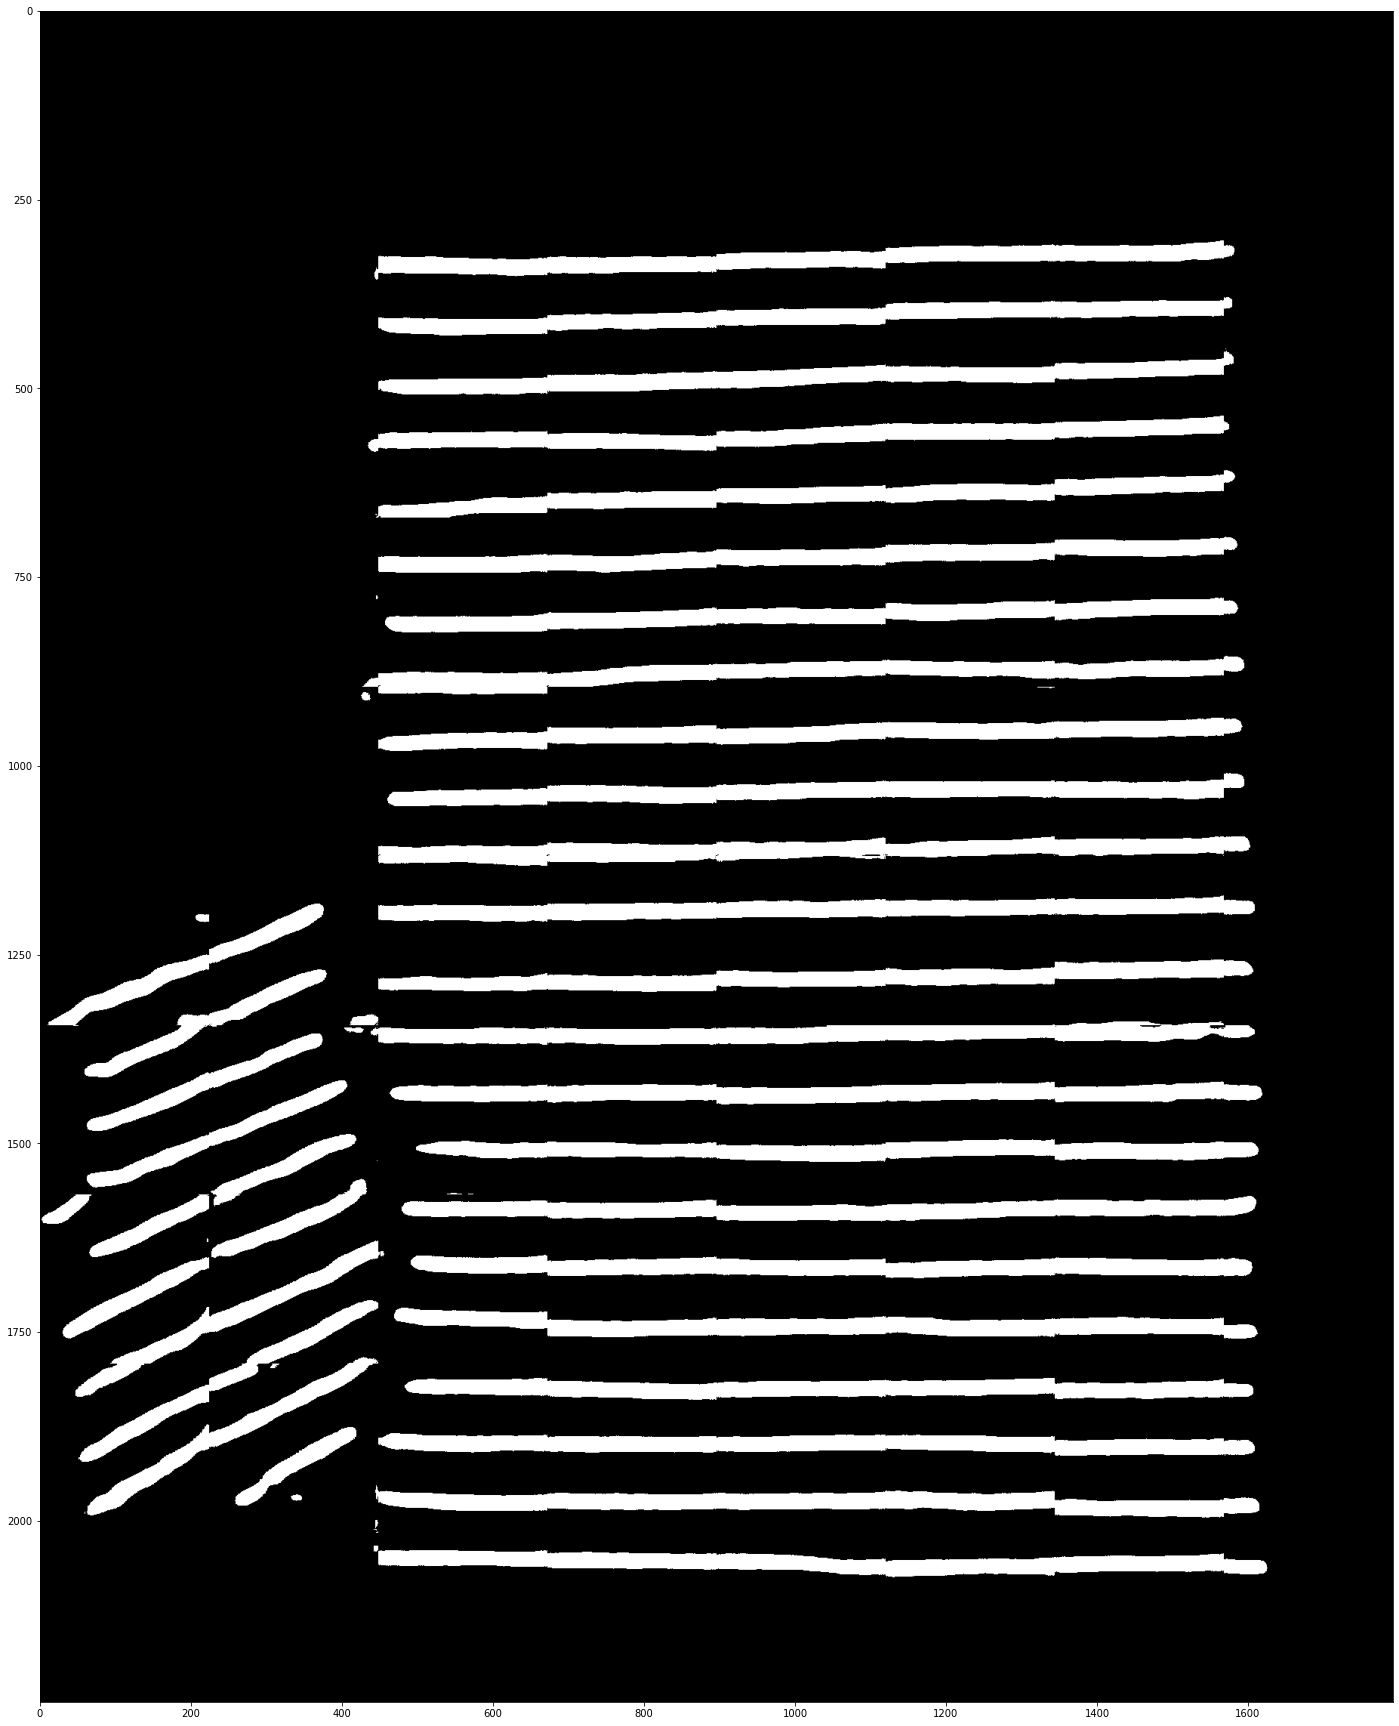

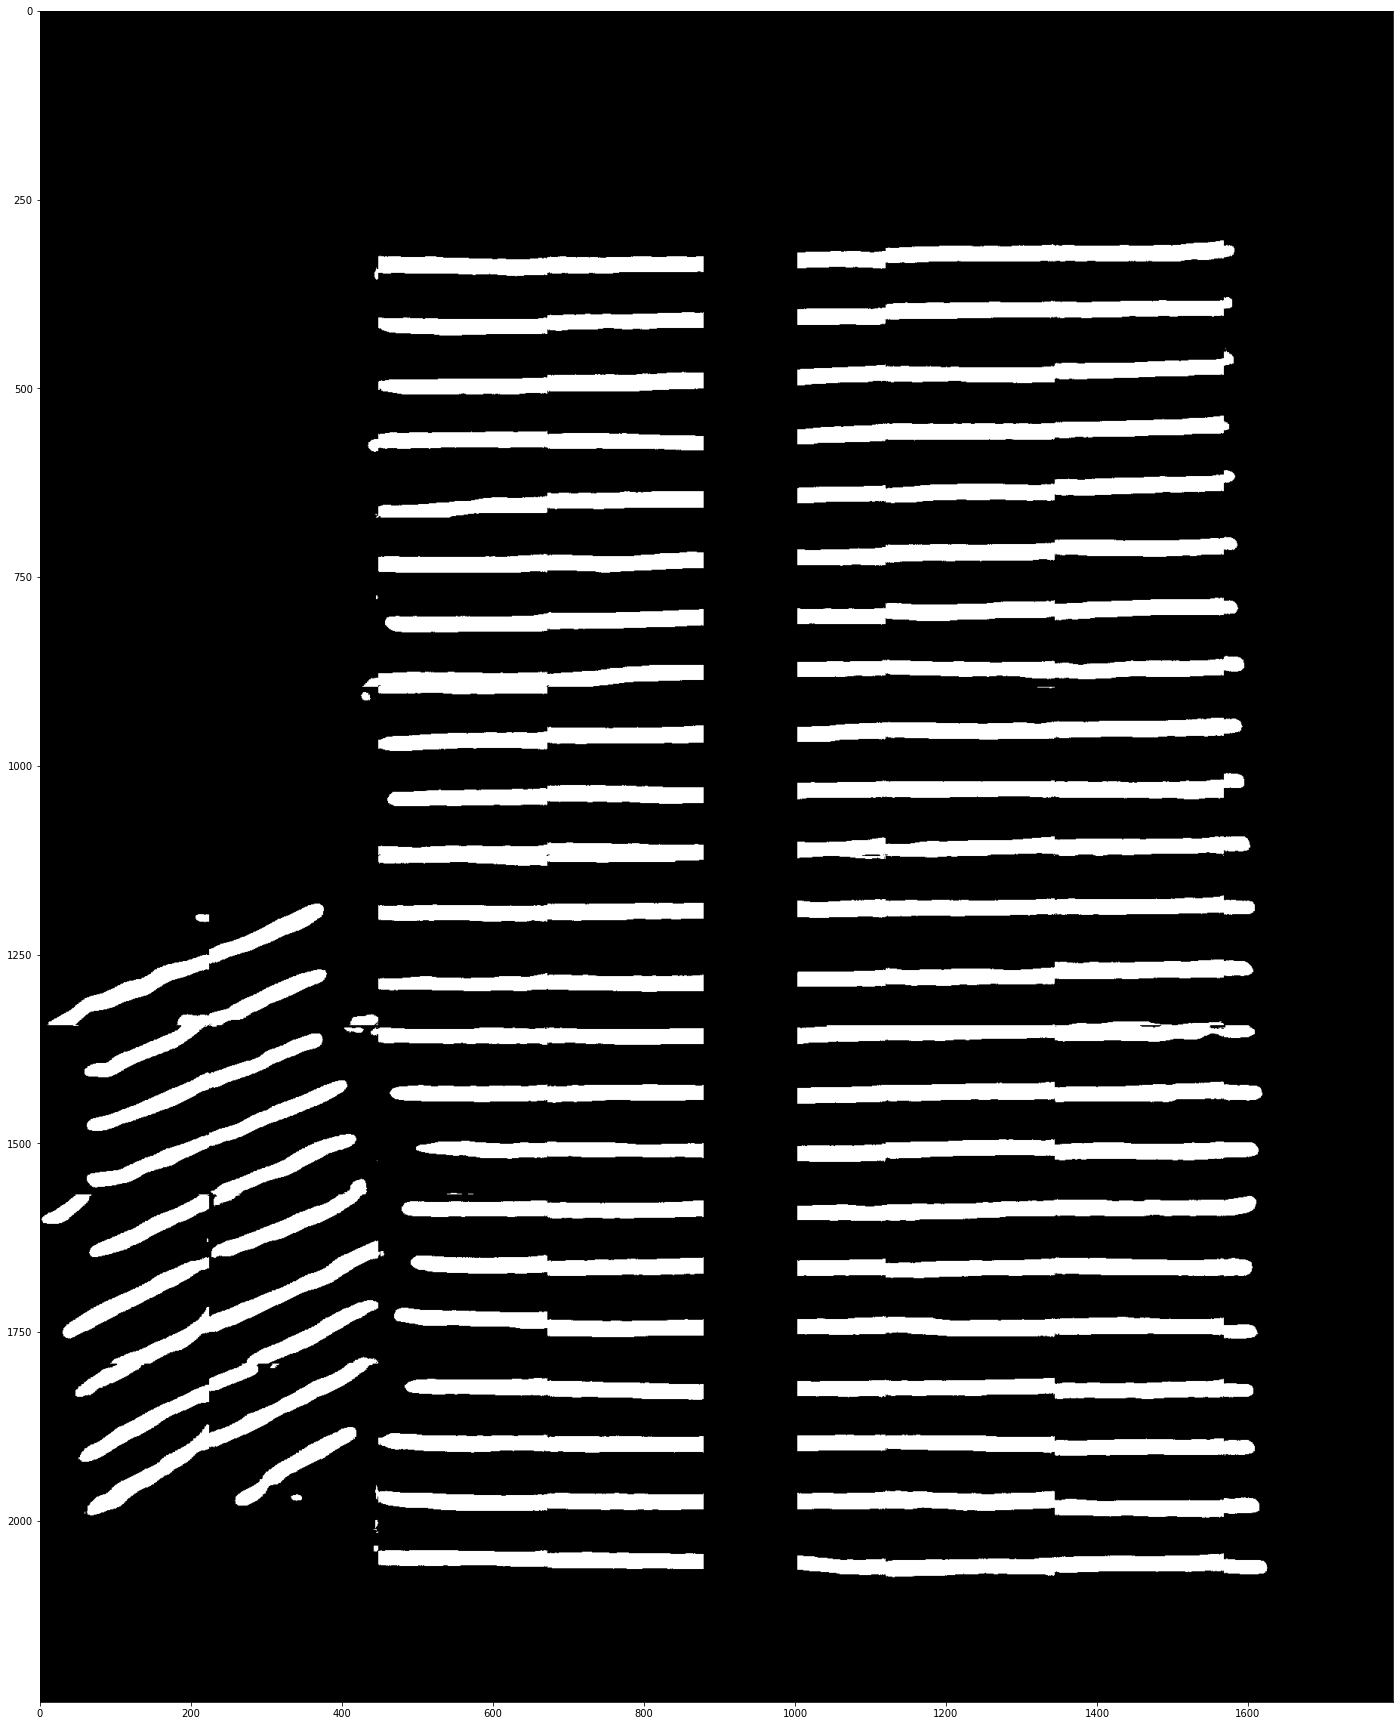

In [ ]:
mask2 = mask.copy()
mask2 = delete_center_line(mask2, 0.01, 0.06)

img_show_from_arr(mask)
img_show_from_arr(mask2)

In [ ]:
def next_neighbor_as_zero(height, width, mask):

  pixels_having_0_as_neighbor = []

  for i in range(1, height-1):
    for j in range(1, width-1):
      if mask[i][j][0] != 0:
        if mask[i-1][j][0] == 0: # downstairs neighbor
          pixels_having_0_as_neighbor.append((i, j))
        elif mask[i][j-1][0] == 0: # left neighbor
          pixels_having_0_as_neighbor.append((i, j))
        elif mask[i+1][j][0] == 0: # upstairs neighbor
          pixels_having_0_as_neighbor.append((i, j))
        elif mask[i][j+1][0] == 0: # right neighbor
          pixels_having_0_as_neighbor.append((i, j))
  return pixels_having_0_as_neighbor

In [ ]:
height, width, depth = img.shape
next_neighbor0_coords = next_neighbor_as_zero(height, width, mask)
next_neighbor0_mask = np.zeros(img.shape)

for coord in next_neighbor0_coords:
  next_neighbor0_mask[coord[0]][coord[1]][0] = 255
  next_neighbor0_mask[coord[0]][coord[1]][1] = 255
  next_neighbor0_mask[coord[0]][coord[1]][2] = 255

img_show_from_arr(next_neighbor0_mask)

IndexError: ignored

In [ ]:
height, width, depth = img.shape
width

2656

In [ ]:
len(next_neighbor0_coords)

5418

In [ ]:
next_neighbor0_mask.shape

(214, 400, 3)

In [ ]:
next_neighbor0_rows = []

for coord in next_neighbor0_coords:
  next_neighbor0_rows.append(coord[0])

len(next_neighbor0_rows)

5418

In [ ]:
next_neighbor0_rows = np.array(next_neighbor0_rows)
next_neighbor0_unique_rows = np.unique(next_neighbor0_rows)
next_neighbor0_unique_rows

array([ 18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202])

In [ ]:
bbox_ycoords = []
bbox_ycoords.append(next_neighbor0_unique_rows[0])
for i in range(len(next_neighbor0_unique_rows)-1):
  if abs(next_neighbor0_unique_rows[i] - next_neighbor0_unique_rows[i+1]) > 3:
    bbox_ycoords.append(next_neighbor0_unique_rows[i])
    bbox_ycoords.append(next_neighbor0_unique_rows[i+1])
bbox_ycoords.append(next_neighbor0_unique_rows[-1])

In [ ]:
len(bbox_ycoords)

8

In [ ]:
bbox_ycoords_pair = [(bbox_ycoords[i], bbox_ycoords[i+1]) for i in range(0, len(bbox_ycoords), 2)]
bbox_ycoords_pair

[(18, 41), (48, 69), (74, 177), (183, 202)]

In [ ]:
len(bbox_ycoords_pair)

4

In [ ]:
bbox_ycoords_pair

[(18, 41), (48, 69), (74, 177), (183, 202)]

In [ ]:
def get_row_heights(bbox_y_pairs):
  row_heights = []
  for pair in bbox_y_pairs:
    row_height = abs(pair[0]-pair[1])
    row_heights.append(row_height)
  return row_heights

In [ ]:
row_heights = get_row_heights(bbox_ycoords_pair)
row_heights

[23, 21, 103, 19]

In [ ]:
mean_row_height = np.mean(row_heights)
mean_row_height

41.5

In [ ]:
row_height_limit = mean_row_height * 0.7
row_height_limit

29.049999999999997

In [ ]:
row_patches = []
for pair in bbox_ycoords_pair:
  if abs(pair[0] - pair[1]) > row_height_limit:
    row_patches.append(pair)

len(row_patches)

1

In [ ]:
next_neighbor0_cols = []

for coord in next_neighbor0_coords:
  next_neighbor0_cols.append(coord[1])

len(next_neighbor0_cols)

5418

In [ ]:
next_neighbor0_cols = np.array(next_neighbor0_cols)
next_neighbor0_unique_cols = np.unique(next_neighbor0_cols)
next_neighbor0_unique_cols[-100:]

array([299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311,
       312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324,
       325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337,
       338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350,
       351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363,
       364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376,
       377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389,
       390, 391, 392, 393, 394, 395, 396, 397, 398])

In [ ]:
len(next_neighbor0_unique_cols)

397

In [ ]:
bbox_xcoords = []
bbox_xcoords.append(next_neighbor0_unique_cols[0])
for i in range(len(next_neighbor0_unique_cols)-1):
  if abs(next_neighbor0_unique_cols[i] - next_neighbor0_unique_cols[i+1]) > 3:
    bbox_xcoords.append(next_neighbor0_unique_cols[i])
    bbox_xcoords.append(next_neighbor0_unique_cols[i+1])
bbox_xcoords.append(next_neighbor0_unique_cols[-1])

In [ ]:
len(bbox_xcoords)

2

In [ ]:
bbox_xcoords

[2, 398]

In [ ]:
bbox_xcoords_pair = [(bbox_xcoords[i], bbox_xcoords[i+1]) for i in range(0, len(bbox_xcoords), 2)]
bbox_xcoords_pair

[(2, 398)]

In [ ]:
def get_col_widths(bbox_x_pairs):
  col_widths = []
  for pair in bbox_x_pairs:
    col_width = abs(pair[0]-pair[1])
    col_widths.append(col_width)
  return col_widths

In [ ]:
col_widths = get_col_widths(bbox_xcoords_pair)
col_widths

[396]

In [ ]:
mean_col_width = np.mean(col_widths)
mean_col_width

396.0

In [ ]:
col_width_limit = mean_col_width * 0.7
col_width_limit

277.2

In [ ]:
def erase_small_lines(mask, bbox_x_pairs, safety_erase_ratio):
  height, width, depth = mask.shape
  for pair in bbox_x_pairs:
    if abs(pair[0] - pair[1]) < col_width_limit:
      for i in range(height):
        for j in range(pair[0], pair[1]+int(width*safety_erase_ratio)):
          mask[i][j][0] = 0
          mask[i][j][1] = 0
          mask[i][j][2] = 0
  return mask


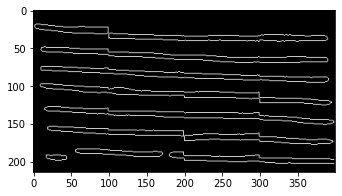

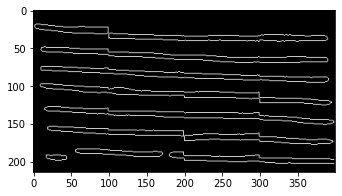

In [ ]:
mask3 = next_neighbor0_mask.copy()
mask3 = erase_small_lines(mask3, bbox_xcoords_pair, 0.01)

img_show_from_arr(next_neighbor0_mask)
img_show_from_arr(mask3)

In [ ]:
next_neighbor0_coords = next_neighbor_as_zero(height, width, mask3)

In [ ]:
def find_image_page_type(cols, line_gap_ratio):
  min_col_num = min(cols)
  max_col_num = max(cols)
  lines_area_width = abs(min_col_num - max_col_num) 
  line_gap_threshold = lines_area_width * line_gap_ratio
  for i in range(len(cols)-1):
    if (cols[i+1] - cols[i]) > line_gap_threshold:
      return "two page image"
  return "one_page_image"

In [ ]:
find_image_page_type(next_neighbor0_unique_cols, 0.08)

'one_page_image'

In [ ]:
def create_row_patches(y1, y2, coords):
  row_patch_coords = []
  for coord in coords:
    if coord[0] >= y1 and coord[0] <= y2:
      row_patch_coords.append(coord)
  return row_patch_coords

In [ ]:
row_patches

[(74, 177)]

In [ ]:
patch = create_row_patches(row_patches[0][0], row_patches[0][1], next_neighbor0_coords)
patch

In [ ]:
patch_cols = [patch[i][1] for i in range(len(patch))]
patch_cols = sorted(patch_cols)
patch_cols = np.array(patch_cols)
patch_unique_cols = np.unique(patch_cols)
len(patch_unique_cols) 

390

In [ ]:
def create_unique_patch_cols(patch):
  patch_cols = [patch[i][1] for i in range(len(patch))]
  patch_cols = sorted(patch_cols)
  patch_cols = np.array(patch_cols)
  patch_unique_cols = np.unique(patch_cols)
  return patch_unique_cols

In [ ]:
patch_unique_col_size = []
patch_unique_cols_list = []
created_patches = []
for row_pair in row_patches:
  patch = create_row_patches(row_pair[0], row_pair[1], next_neighbor0_coords)
  created_patches.append(patch)
  patch_unique_cols = create_unique_patch_cols(patch)
  patch_unique_cols_list.append(patch_unique_cols)
  patch_unique_col_size.append(len(patch_unique_cols))

mapped_patch_unique_cols_with_its_size = list(zip(patch_unique_cols_list, patch_unique_col_size))
mapped_patch_with_its_unique_cols_and_size = list(zip(created_patches, mapped_patch_unique_cols_with_its_size))
patch_unique_col_size

[390]

In [ ]:
mapped_patch_with_its_unique_cols_and_size[0][1][1]

390

In [ ]:
patch_unique_col_size = np.array(patch_unique_col_size)
patch_unique_col_size_limit = np.mean(patch_unique_col_size) * 0.8
patch_unique_col_size_limit

312.0

In [ ]:
def create_bbox_list(rows, cols, line_gap_ratio, coords, patch_unique_col_size_limit):
  page_type = find_image_page_type(cols, line_gap_ratio)
  bbox_list = []
  if page_type == "two page image":
    line_gap_threshold = abs(min(cols) - max(cols)) * line_gap_ratio
    idx = 0
    for row_pair in rows:
      y1 = row_pair[0]
      y2 = row_pair[1]
      patch = mapped_patch_with_its_unique_cols_and_size[idx][0]
      patch_unique_cols = mapped_patch_with_its_unique_cols_and_size[idx][1][0]
      patch_unique_col_size = mapped_patch_with_its_unique_cols_and_size[idx][1][1]
      idx += 1
      x_min = min(patch_unique_cols)
      x_max = max(patch_unique_cols)
      if patch_unique_col_size > patch_unique_col_size_limit:
        for i in range(len(patch_unique_cols)-1):
          if abs(patch_unique_cols[i] - patch_unique_cols[i+1]) > line_gap_threshold:
            bbox_list.append((x_min, y1, patch_unique_cols[i], y2))
            bbox_list.append((patch_unique_cols[i+1], y1, x_max, y2))
      else:
        bbox_list.append((x_min, y1, x_max, y2))

  else:
    for row_pair in rows:
      y1 = row_pair[0]
      y2 = row_pair[1]
      patch = create_row_patches(row_pair[0], row_pair[1], coords)
      patch_unique_cols = create_unique_patch_cols(patch)
      x_min = min(patch_unique_cols)
      x_max = max(patch_unique_cols)
      bbox_list.append((x_min, y1, x_max, y2))

  return bbox_list

In [ ]:
bboxes = create_bbox_list(row_patches, next_neighbor0_unique_cols, 0.08, next_neighbor0_coords, patch_unique_col_size_limit)
len(bboxes)

1

In [ ]:
bboxes

[(9, 74, 398, 177)]

In [ ]:
def create_line_image_from_bbox(bbox, img, safety_gap_x, safety_gap_y):
  x1, y1, x2, y2 = bbox
  row = img[y1-safety_gap_y:y2+safety_gap_y, x1-safety_gap_x:x2+safety_gap_x, :]
  return row

def create_row_images(bbox_list, img, safety_gap_x, safety_gap_y):
  rows = []
  for i in range(len(bbox_list)):
    row = create_line_image_from_bbox(bbox_list[i], img, safety_gap_x, safety_gap_y)
    rows.append(row)
  return rows

In [ ]:
rows = create_row_images(bboxes, img, 10, 5)
img_show_from_arr(img)
for row in rows:
  img_show_from_arr(row)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for row in rows:
  print(row.shape)

(45, 912, 3)
(45, 915, 3)
(45, 907, 3)
(49, 903, 3)
(49, 915, 3)
(47, 898, 3)
(47, 915, 3)
(43, 914, 3)
(43, 902, 3)
(42, 910, 3)
(42, 907, 3)
(46, 904, 3)
(46, 891, 3)
(45, 928, 3)
(45, 904, 3)
(49, 914, 3)
(49, 920, 3)
(45, 915, 3)
(45, 914, 3)
(52, 928, 3)
(52, 914, 3)
(48, 903, 3)
(48, 906, 3)
(49, 903, 3)
(49, 902, 3)
(48, 907, 3)
(48, 918, 3)
(39, 909, 3)
(39, 917, 3)
(41, 899, 3)
(41, 903, 3)
(48, 907, 3)
(48, 917, 3)
(43, 911, 3)
(43, 906, 3)
(40, 912, 3)
(40, 907, 3)
(46, 911, 3)
(46, 913, 3)


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
dpi = matplotlib.rcParams['figure.dpi']
for row in rows:
  height, width, depth = row.shape
  figsize = width / float(dpi), height / float(dpi)

  plt.figure(figsize=figsize)
  plt.imshow(row)
  plt.show()
img_show_from_arr(img)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
img_show_from_arr(rows[22])

In [ ]:
rows[0]